# 시작하세요! 텐서플로 2.0 프로그래밍 - 김환희 지음
- https://github.com/wikibook/tf2

# 사용할 모듈

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import random as rd

# 6장 합성곱 신경망(Convolutional Neural Network; CNN)
- CNN의 구성
- 합성곱 계층, 풀링 계층, 드롭아웃 등등
- Fashion MNIST 효율성 증대

## 합성곱 신경망의 구성
- 특징 추출기 - 합성곱 계층 + 풀링 계층
  - 합성곱 계층: filter -> 변화됨
    - tf.keras.layers.Conv2D: 이차원 이미지에 쓰이는 합성곱 계층
    - kernel_size: filter matrix의 크기
    - strides: 필터가 한 계산마다 이동하는 크기
    - padding(valid | same): 패딩(주변에 빈 값(0)을 넣어 출력 이미지의 크기를 입력과 같도록) -> same으로 하면 쓸 수 있음
    - filters: 필터의 개수
  - 풀링 계층: 전체 크기 제한
    - tf.keras.layers.MaxPool2D: 이차원 이미지에 쓰이는 풀링 계층(최댓값 남김)
    - pool_size: 최댓값 남기는 크기
    - strides: 이동하는 크기
- 분류기 - Dense Layer(Fully-connected Layer)
  - 드롭아웃 계층: overfitting 방지
    - 학습 과정에서 확률적으로 일부 뉴런에 대한 연결을 끊음
    - rate: 비율
- 합성곱 계층, 풀링 계층, 드롭아웃 계층 중 학습이 되는 것은 합성곱 계층 뿐

## Fashion MNIST 문제 2
- 본래 데이터는 높이, 너비만
- 실제 CNN에서는 채널 수(한 픽셀을 표현하는 데이터 수? rgb면 3개)까지도
- 그렇기에 본래 데이터의 채널 수를 1로 치고 reshape

4422102/4422102 [==============================] - 1s 0us/step


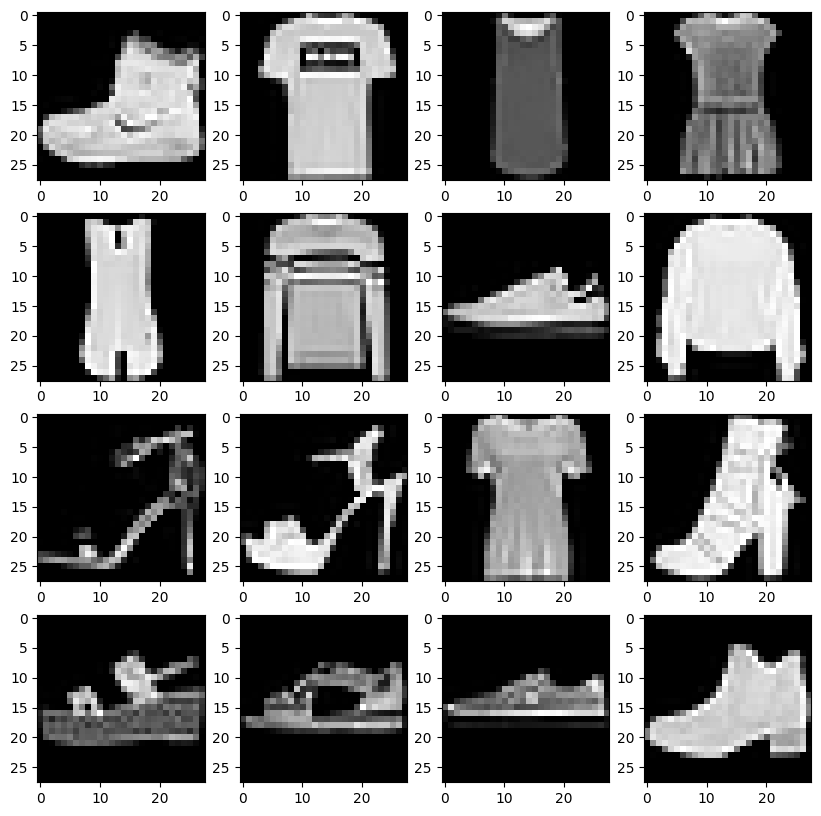

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

train_x = train_x / 255.0
test_x = test_x / 255.0

train_x = train_x.reshape(-1, 28, 28, 1)
test_x = test_x.reshape(-1, 28, 28, 1)

plt.figure(figsize=(10, 10))
for c in range(16):
  plt.subplot(4, 4, c + 1)
  plt.imshow(train_x[c].reshape(28, 28), cmap='gray')

plt.show()
print(train_y[:16])

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=16),
    tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=32),
    tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 30976)             0         
                                                                 
 dense (Dense)               (None, 128)               3965056   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3,989,642
Trainable params: 3,989,642
Non-

Epoch 1/25
1407/1407 [==============================] - 24s 9ms/step - loss: 0.4621 - accuracy: 0.8359 - val_loss: 0.3725 - val_accuracy: 0.8640
Epoch 2/25
1407/1407 [==============================] - 13s 9ms/step - loss: 0.3376 - accuracy: 0.8769 - val_loss: 0.3697 - val_accuracy: 0.8669
Epoch 3/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2909 - accuracy: 0.8940 - val_loss: 0.3646 - val_accuracy: 0.8743
Epoch 4/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2427 - accuracy: 0.9107 - val_loss: 0.4025 - val_accuracy: 0.8693
Epoch 5/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2137 - accuracy: 0.9206 - val_loss: 0.4336 - val_accuracy: 0.8723
Epoch 6/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.1876 - accuracy: 0.9310 - val_loss: 0.4596 - val_accuracy: 0.8689
Epoch 7/25
1407/1407 [==============================] - 8s 5ms/step - loss: 0.1641 - accuracy: 0.9392 - val_loss: 0.4869 - val_accurac

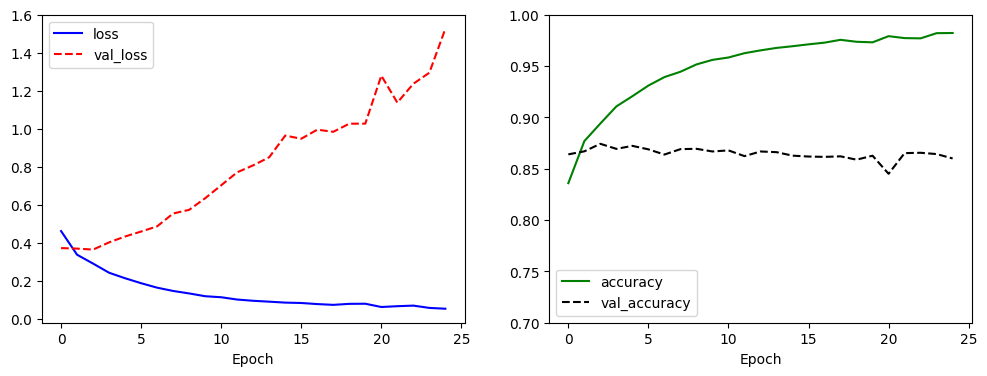

In [ ]:
history = model.fit(train_x, train_y, epochs=25, validation_split=0.25, batch_size=32)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

verbose: 보여주는 모드?

In [ ]:
model.evaluate(test_x, test_y, verbose=0) # 훈련 과정 미출력
model.evaluate(test_x, test_y, verbose=1) # 훈련 과정 + loss 등 출력
model.evaluate(test_x, test_y, verbose=2) # loss 등만 출력
# verbose=(else): 훈련 과정(epoch)만

313/313 [==============================] - 1s 3ms/step - loss: 1.6390 - accuracy: 0.8525
313/313 - 1s - loss: 1.6390 - accuracy: 0.8525 - 1s/epoch - 3ms/step


[1.6389812231063843, 0.8525000214576721]

## 위 문단의 개선

In [ ]:
# ==========================================================
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

train_x = train_x / 255.0
test_x = test_x / 255.0

train_x = train_x.reshape(-1, 28, 28, 1)
test_x = test_x.reshape(-1, 28, 28, 1)

# ==========================================================
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=16),
    tf.keras.layers.MaxPool2D(strides=(2, 2)),
    tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=32),
    tf.keras.layers.MaxPool2D(strides=(2, 2)),
    tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          18496     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

Epoch 1/25
1407/1407 [==============================] - 9s 6ms/step - loss: 0.3518 - accuracy: 0.8742 - val_loss: 0.3208 - val_accuracy: 0.8819
Epoch 2/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3120 - accuracy: 0.8864 - val_loss: 0.3116 - val_accuracy: 0.8879
Epoch 3/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2925 - accuracy: 0.8942 - val_loss: 0.3000 - val_accuracy: 0.8879
Epoch 4/25
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2692 - accuracy: 0.9020 - val_loss: 0.2942 - val_accuracy: 0.8943
Epoch 5/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2583 - accuracy: 0.9058 - val_loss: 0.2856 - val_accuracy: 0.8966
Epoch 6/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2456 - accuracy: 0.9093 - val_loss: 0.2828 - val_accuracy: 0.8985
Epoch 7/25
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2348 - accuracy: 0.9128 - val_loss: 0.2851 - val_accuracy:

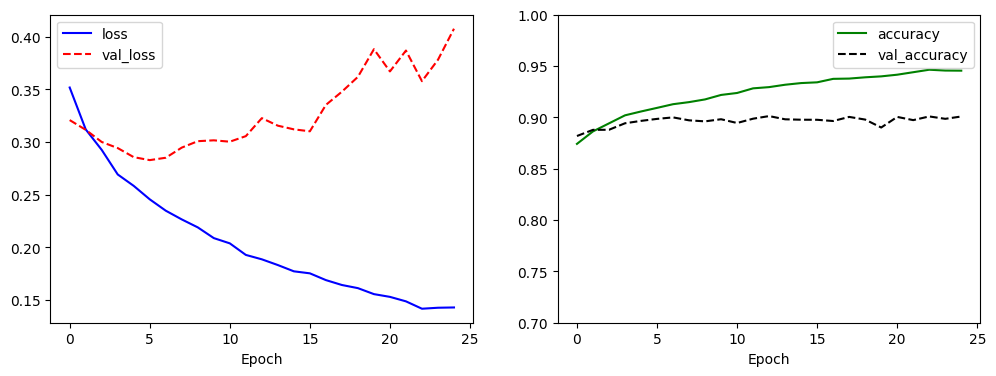

In [ ]:
history = model.fit(train_x, train_y, epochs=25, validation_split=0.25, batch_size=32)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [ ]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 3ms/step - loss: 0.4263 - accuracy: 0.8986


[0.4263489842414856, 0.8985999822616577]

## 더 많은 레이어 쌓기; VGG

Epoch 1/25
450/450 [==============================] - 12s 19ms/step - loss: 0.6492 - accuracy: 0.7609 - val_loss: 0.3602 - val_accuracy: 0.8669
Epoch 2/25
450/450 [==============================] - 9s 20ms/step - loss: 0.3803 - accuracy: 0.8604 - val_loss: 0.2831 - val_accuracy: 0.8980
Epoch 3/25
450/450 [==============================] - 8s 18ms/step - loss: 0.3201 - accuracy: 0.8845 - val_loss: 0.2452 - val_accuracy: 0.9081
Epoch 4/25
450/450 [==============================] - 8s 18ms/step - loss: 0.2905 - accuracy: 0.8943 - val_loss: 0.2468 - val_accuracy: 0.9084
Epoch 5/25
450/450 [==============================] - 9s 20ms/step - loss: 0.2687 - accuracy: 0.9020 - val_loss: 0.2186 - val_accuracy: 0.9207
Epoch 6/25
450/450 [==============================] - 8s 18ms/step - loss: 0.2560 - accuracy: 0.9074 - val_loss: 0.2133 - val_accuracy: 0.9231
Epoch 7/25
450/450 [==============================] - 8s 18ms/step - loss: 0.2415 - accuracy: 0.9128 - val_loss: 0.2129 - val_accuracy: 0.924

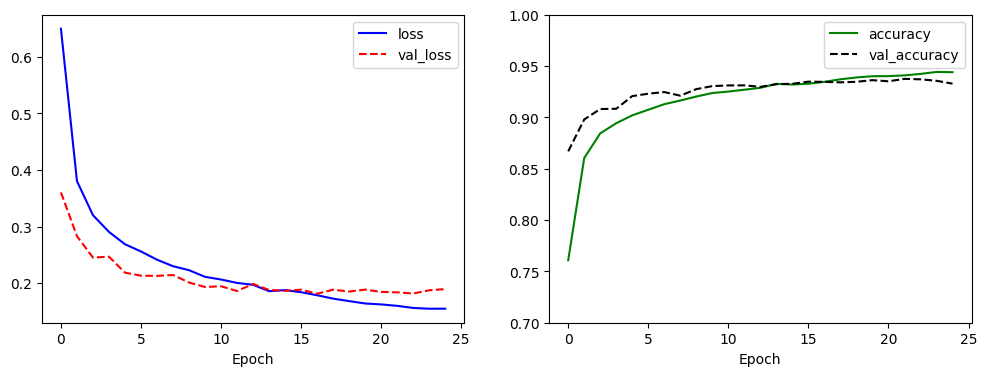

[0.20391206443309784, 0.9309999942779541]

In [ ]:
# ================================================================
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

train_x = train_x / 255.0
test_x = test_x / 255.0

train_x = train_x.reshape(-1, 28, 28, 1)
test_x = test_x.reshape(-1, 28, 28, 1)

# ============================================================
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_x, train_y, epochs=25, validation_split=0.25, batch_size=100)

# ============================================================
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_x, test_y, verbose=0)

## 이미지 보강(Image Agumentation)을 통한 효율 증대
- ImageDataGenerator
  - rotation: 회전
  - zoom: 확대
  - shear: 기울임(기울임체처럼 늘리는 느낌, rotate와는 다름)
  - shift: 이동
  - flip: 대칭이동

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

train_x = train_x / 255.0
test_x = test_x / 255.0

train_x = train_x.reshape(-1, 28, 28, 1)
test_x = test_x.reshape(-1, 28, 28, 1)

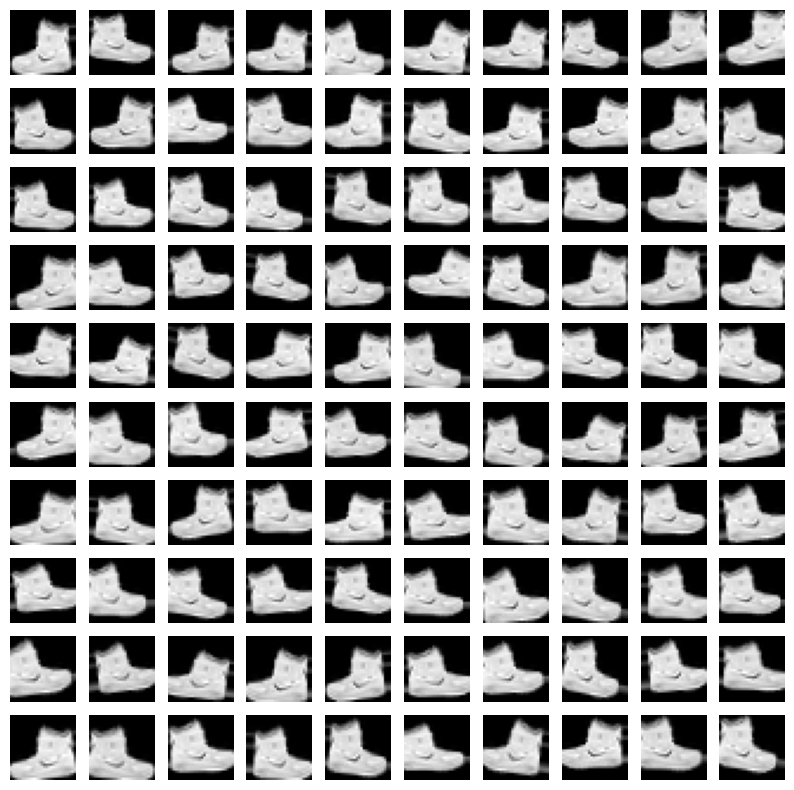

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.10,
    shear_range=0.5,
    width_shift_range=0.10,
    height_shift_range=0.10,
    horizontal_flip=True,
    # vertical_flip: fashion mnist에서는 필요 X
    vertical_flip=False
)

augment_size = 100

x_augmented = image_generator.flow(
    # train_x에 해당하는 값들
    np.tile(train_x[0].reshape(28 * 28), 100).reshape(-1, 28, 28, 1),
    # train_x에 해당하는 y값들
    np.zeros(augment_size),
    # 한 번에 생성할 이미지 개수
    batch_size=augment_size,
    # 섞을것인가 여부
    shuffle=False
).next()[0]

plt.figure(figsize=(10, 10))
for c in range(100):
  plt.subplot(10, 10, c + 1)
  plt.axis('off')
  plt.imshow(x_augmented[c].reshape(28, 28), cmap='gray')

plt.show()

In [ ]:
augment_size = 30000
randidx = np.random.randint(train_x.shape[0], size=augment_size)
x_augmented = train_x[randidx].copy()
y_augmented = train_y[randidx].copy()
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size),
                                   batch_size=augment_size, shuffle=False).next()[0]

train_x = np.concatenate((train_x, x_augmented))
train_y = np.concatenate((train_y, y_augmented))

Epoch 1/25
1055/1055 [==============================] - 17s 14ms/step - loss: 0.5949 - accuracy: 0.7823 - val_loss: 0.5996 - val_accuracy: 0.7751
Epoch 2/25
1055/1055 [==============================] - 14s 13ms/step - loss: 0.3718 - accuracy: 0.8653 - val_loss: 0.4943 - val_accuracy: 0.8121
Epoch 3/25
1055/1055 [==============================] - 15s 14ms/step - loss: 0.3244 - accuracy: 0.8820 - val_loss: 0.4383 - val_accuracy: 0.8335
Epoch 4/25
1055/1055 [==============================] - 14s 14ms/step - loss: 0.2987 - accuracy: 0.8941 - val_loss: 0.4058 - val_accuracy: 0.8498
Epoch 5/25
1055/1055 [==============================] - 14s 13ms/step - loss: 0.2815 - accuracy: 0.8996 - val_loss: 0.3766 - val_accuracy: 0.8626
Epoch 6/25
1055/1055 [==============================] - 14s 13ms/step - loss: 0.2651 - accuracy: 0.9037 - val_loss: 0.3738 - val_accuracy: 0.8622
Epoch 7/25
1055/1055 [==============================] - 14s 13ms/step - loss: 0.2583 - accuracy: 0.9068 - val_loss: 0.3729 -

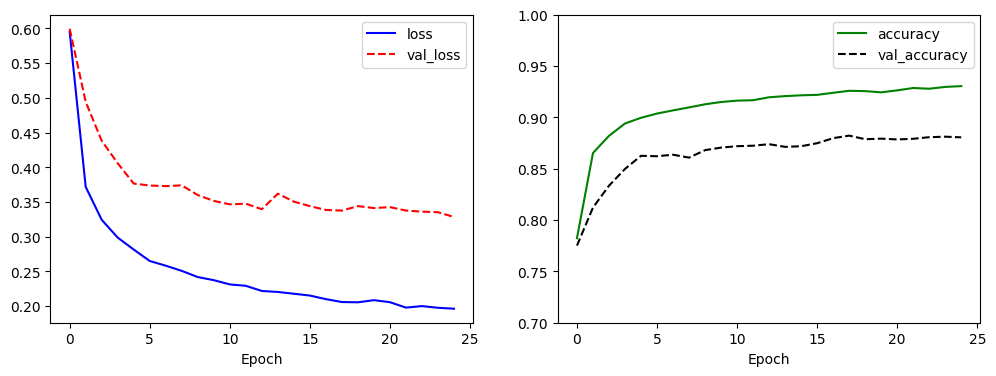

[0.19516398012638092, 0.932200014591217]

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(train_x, train_y, epochs=25, validation_split=0.25, batch_size=64)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_x, test_y, verbose=0)

## @ 과제 2
- 과제 1에서의 MNIST 문제 복습하기
- MNIST 문제에서 사용한 모델을 향상시키자

**평가**

1. 데이터를 전처리할 것
  - 데이터를 불러오기 *(과제 1 코드)*
  - 정규화(Normalization)를 할 것
  - 이미지 보강을 시행할 것
  (주의할 점: 이미지를 *대칭 이동*하지 말 것)
1. 다음 세 가지 모델을 비교해볼 것
  - Dense 레이어를 사용한 모델 *(과제 1 코드)*
  - 드롭아웃을 사용한 합성곱 신경망 (이건 직접 짜기)
  - VCG *(위 코드 복붙)*
  1. 모델을 생성할 것
  1. 모델을 실행할 것
  1. 모델을 평가할 것
    - loss, val_loss, accuracy, val_accuracy를 그래프로 표현할 것
    - predict, evaluate로 test_x, test_y를 넣어 모델 평가하기


# 7장 순환 신경망(Recurrent Neural Network; RNN)
출력 값이 다음 신경망으로 보내짐 & **"자연어 처리"**에 사용
- 이미지 설명 생성(Image Captioning)
- 감성 분석(Sentiment Classification)
- 기계 번역(Machine Translation)

## 주요 레이어들

### SimpleRNN Layer
- 가장 간단한 RNN
- 활성화 함수: tanh(ReLU 등도 쓰임)

In [ ]:
# 0.1, 0.2, 0.3, ...의 연속된 수열 뒤에 어떤 수가 올지 추측
# x: 앞의 수, y: 와야될 수(신경망이 추측해야할 수)
x = []
y = []
for i in range(6):
  lst = list(range(i, i + 4))
  x.append(list(map(lambda c: [c / 10], lst)))
  y.append((i + 4) / 10)

x = np.array(x)
y = np.array(y)
for i in range(len(x)):
  print(x[i], y[i])

[[0. ]
 [0.1]
 [0.2]
 [0.3]] 0.4
[[0.1]
 [0.2]
 [0.3]
 [0.4]] 0.5
[[0.2]
 [0.3]
 [0.4]
 [0.5]] 0.6
[[0.3]
 [0.4]
 [0.5]
 [0.6]] 0.7
[[0.4]
 [0.5]
 [0.6]
 [0.7]] 0.8
[[0.5]
 [0.6]
 [0.7]
 [0.8]] 0.9


In [ ]:
model = tf.keras.Sequential([
    # input_shape: 앞 -> timesteps, 뒤 -> input_dim
    # 입력 차원은 배치 차원(1개) + input_shape 꼴
    tf.keras.layers.SimpleRNN(units=10, return_sequences=False, input_shape=(4, 1)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 10)                120       
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x, y, epochs=100, verbose=0)
print(model.predict(x))

1/1 [==============================] - 0s 231ms/step
[[0.45909554]
 [0.5767368 ]
 [0.66198367]
 [0.7163647 ]
 [0.74475497]
 [0.7528816 ]]


In [ ]:
print(model.predict(np.array([[[0.6], [0.7], [0.8], [0.9]]])))

1/1 [==============================] - 0s 20ms/step
[[0.74595386]]


### LSTM Layer
- SimpleRNN Layer의 문제점
  - 입력 데이터가 길어질수록(timestep이 커질수록) 학습능력이 떨어짐(장기의존성 문제; Long-Term Dependency)
  - 입력의 길이가 길어지면 먼 거리의 정보를 반영하기 힘듦
- LSTM의 개선점
  - LSTM 셀 사이에서만 공유되는 cell state
  - 굉장히 복잡한 식
    - 굳이 알고 싶다면 '밑바닥부터 시작하는 딥러닝 2'를 참고
  - sigmoid: 정보가 통과하는 게이트

곱셈 문제

0 ~ 1 사이의 실수 100개 중 2개가 마킹되어있다. 해당 데이터의 정답은 두 마킹된 수의 곱이다. 이를테면, 0.5와 0.4라는 수에 마킹이 되어 있다면, 0.2가 정답이다. 이를 추측하는 프로그램을 제작하자.

In [ ]:
x = []
y = []

for i in range(3000):
  lst = np.random.rand(100)
  idx = np.random.choice(100, 2, replace=False)
  zeros = np.zeros(100)
  zeros[idx] = 1
  x.append(np.array(list(zip(zeros, lst))))
  y.append(np.prod(lst[idx]))

x = np.array(x)
y = np.array(y)

1. SimpleRNN

In [ ]:
# return_sequences: 뒤에거와 연결된 RNN 제작
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=30, return_sequences=True, input_shape=[100, 2]),
    tf.keras.layers.SimpleRNN(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

history = model.fit(x[:2560], y[:2560], epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100
32/32 [==============================] - 8s 170ms/step - loss: 0.0781 - val_loss: 0.0496
Epoch 2/100
32/32 [==============================] - 4s 127ms/step - loss: 0.0513 - val_loss: 0.0477
Epoch 3/100
32/32 [==============================] - 4s 123ms/step - loss: 0.0489 - val_loss: 0.0477
Epoch 4/100
32/32 [==============================] - 5s 162ms/step - loss: 0.0489 - val_loss: 0.0475
Epoch 5/100
32/32 [==============================] - 4s 124ms/step - loss: 0.0493 - val_loss: 0.0492
Epoch 6/100
32/32 [==============================] - 4s 124ms/step - loss: 0.0485 - val_loss: 0.0472
Epoch 7/100
32/32 [==============================] - 5s 159ms/step - loss: 0.0482 - val_loss: 0.0472
Epoch 8/100
32/32 [==============================] - 4s 127ms/step - loss: 0.0476 - val_loss: 0.0487
Epoch 9/100
32/32 [==============================] - 4s 131ms/step - loss: 0.0478 - val_loss: 0.0475
Epoch 10/100
32/32 [==============================] - 5s 152ms/step - loss: 0.0483 - val_lo

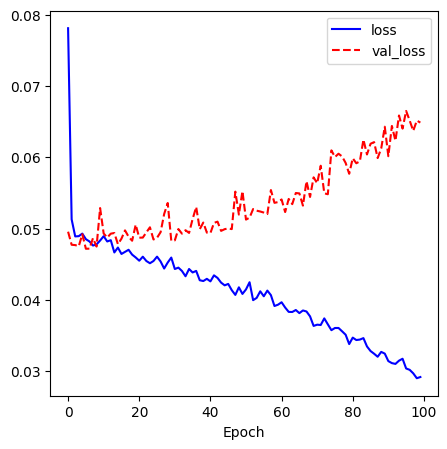

In [ ]:
plt.figure(figsize=(5, 5))

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [ ]:
prediction = model.predict(x[2560:])
fail = 0

for i in range(len(prediction)):
  if abs(prediction[i][0] - y[2560 + i]) > 0.04:
    fail += 1
print('correctness:', (440 - fail) / 440 * 100, '%')

14/14 [==============================] - 0s 18ms/step
correctness: 10.681818181818182 %


2. LSTM Layer

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=30, return_sequences=True, input_shape = [100, 2]),
    tf.keras.layers.LSTM(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

history = model.fit(x[:2560], y[:2560], epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
64/64 [==============================] - 5s 27ms/step - loss: 0.0507 - val_loss: 0.0461
Epoch 2/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0483 - val_loss: 0.0460
Epoch 3/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0478 - val_loss: 0.0458
Epoch 4/100
64/64 [==============================] - 1s 12ms/step - loss: 0.0479 - val_loss: 0.0460
Epoch 5/100
64/64 [==============================] - 1s 14ms/step - loss: 0.0482 - val_loss: 0.0462
Epoch 6/100
64/64 [==============================] - 1s 14ms/step - loss: 0.0478 - val_loss: 0.0472
Epoch 7/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0479 - val_loss: 0.0486
Epoch 8/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0480 - val_loss: 0.0456
Epoch 9/100
64/64 [==============================] - 1s 11ms/step - loss: 0.0476 - val_loss: 0.0457
Epoch 10/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0479 - val_loss: 0.0459

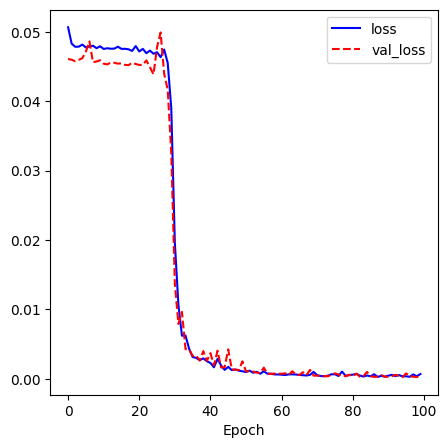

In [ ]:
plt.figure(figsize=(5, 5))

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [ ]:
prediction = model.predict(x[2560:])
fail = 0

for i in range(len(prediction)):
  if abs(prediction[i][0] - y[2560 + i]) > 0.04:
    fail += 1
print('correctness:', (440 - fail) / 440 * 100, '%')

14/14 [==============================] - 1s 6ms/step
correctness: 98.4090909090909 %


### GRU Layer
- LSTM보다 간단한 편(마찬가지로 복잡해서 구조는 생략)
- cell state 대신 h(중간 출력)에 기존 출력이 어느 정도 반영

곱셈 문제로 실험

In [ ]:
# 코드 복붙
x = []
y = []

for i in range(3000):
  lst = np.random.rand(100)
  idx = np.random.choice(100, 2, replace=False)
  zeros = np.zeros(100)
  zeros[idx] = 1
  x.append(np.array(list(zip(zeros, lst))))
  y.append(np.prod(lst[idx]))

x = np.array(x)
y = np.array(y)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.GRU(units=30, return_sequences=True, input_shape=[100, 2]),
    tf.keras.layers.GRU(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

history = model.fit(x[:2560], y[:2560], epochs=100, validation_split=0.2, batch_size=32)

Epoch 1/100
64/64 [==============================] - 5s 19ms/step - loss: 0.0638 - val_loss: 0.0484
Epoch 2/100
64/64 [==============================] - 1s 9ms/step - loss: 0.0524 - val_loss: 0.0481
Epoch 3/100
64/64 [==============================] - 1s 9ms/step - loss: 0.0519 - val_loss: 0.0477
Epoch 4/100
64/64 [==============================] - 1s 9ms/step - loss: 0.0517 - val_loss: 0.0486
Epoch 5/100
64/64 [==============================] - 1s 9ms/step - loss: 0.0519 - val_loss: 0.0477
Epoch 6/100
64/64 [==============================] - 1s 9ms/step - loss: 0.0516 - val_loss: 0.0477
Epoch 7/100
64/64 [==============================] - 1s 11ms/step - loss: 0.0515 - val_loss: 0.0478
Epoch 8/100
64/64 [==============================] - 1s 15ms/step - loss: 0.0518 - val_loss: 0.0475
Epoch 9/100
64/64 [==============================] - 1s 9ms/step - loss: 0.0517 - val_loss: 0.0484
Epoch 10/100
64/64 [==============================] - 1s 9ms/step - loss: 0.0515 - val_loss: 0.0479
Epoch 

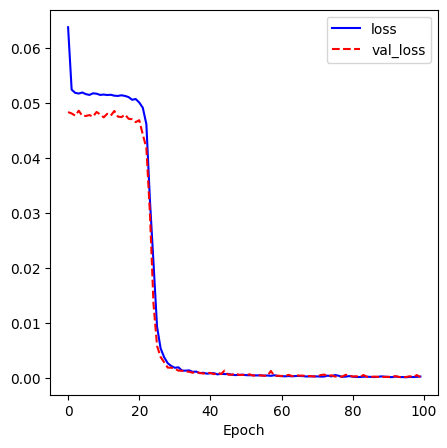

In [ ]:
plt.figure(figsize=(5, 5))

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [ ]:
prediction = model.predict(x[2560:])
fail = 0

for i in range(len(prediction)):
  if abs(prediction[i][0] - y[2560 + i]) > 0.04:
    fail += 1
print('correctness:', (440 - fail) / 440 * 100, '%')

14/14 [==============================] - 1s 4ms/step
correctness: 97.95454545454545 %


@ 과제 3

## 긍정, 부정 감정 분석
- 단어 -> 인덱스(원-핫 인코딩) -> 임베딩 레이어 -> 단어 임베딩(더욱 효율적)

영화 데이터 불러들이기
- tf.keras.utils.get_file: filename, url로 불러들이는 file 객체

In [ ]:
path_to_train_file = tf.keras.utils.get_file('train.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')
path_to_test_file = tf.keras.utils.get_file('test.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')

# 불러들이기
train_text = open(path_to_train_file, 'rb').read().decode(encoding='utf-8')
test_text = open(path_to_test_file, 'rb').read().decode(encoding='utf-8')

# 편집
train_y = np.array([[int(row.split('\t')[2])] for row in train_text.split('\n')[1:] if row.count('\t') > 0])
test_y = np.array([[int(row.split('\t')[2])] for row in test_text.split('\n')[1:] if row.count('\t') > 0])

print(len(train_y), len(test_y))

4893335/4893335 [==============================] - 0s 0us/step
150000 50000


자연어 토큰화, 정제(Tokenization, Cleaning)

In [ ]:
import re
# From https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
def clean_str(string):    
    string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)

    return string.lower()


train_text_x = [row.split('\t')[1] for row in train_text.split('\n')[1:] if row.count('\t') > 0]
train_text_x = [clean_str(sentence) for sentence in train_text_x]
# 문장을 띄어쓰기 단위로 단어 분리
sentences = [sentence.split(' ') for sentence in train_text_x]
for i in range(5):
    print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조차', '가볍지', '않구나']
['너무재밓었다그래서보는것을추천한다']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그의', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨에서', '늙어보이기만', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


네트워크에 입력하기 위해서는 데이터의 크기를 맞춰야 함
긴 문장은 줄이고, 짧은 문장에는 패딩을 넣어야 함

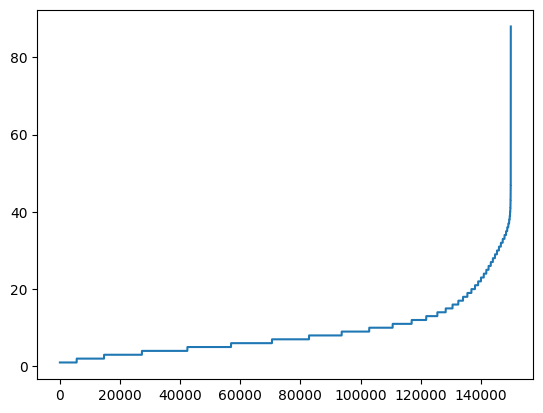

142587


In [ ]:
sentence_len = [len(sentence) for sentence in sentences]
sentence_len.sort()
plt.plot(sentence_len)
plt.show()

print(sum([int(l<=25) for l in sentence_len]))

#### cf) 패딩 & 토큰화하는 방법
- 모든 문장을 25단어로
  - 부족 -> 패딩 추가
  - 넘침 -> 뒤엣것은 자름
- 한 단어당 5글자로 제한(최대한 분산 억제)


In [ ]:
# 1. 긴 글자를 짧게(5글자 이내), 긴 문장을 짧게(25단어 이내)
sentences_new = []
for sentence in sentences:
    sentences_new.append([word[:5] for word in sentence][:25])
sentences = sentences_new
for i in range(5):
    print(sentences[i])

# ================================

# 2. 토큰화 & 패딩
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 희소한 문자를 토큰화하는 객체 생성, num_words: 남기는 단어 개수
tokenizer = Tokenizer(num_words=20000)
# 데이터를 실제로 입력 -> 이를 바탕으로 임베딩 레이어 생성
tokenizer.fit_on_texts(sentences)
# 문장을 입력 -> 숫자로 변환
train_x = tokenizer.texts_to_sequences(sentences)
# 패딩을 더함
train_x = pad_sequences(train_x, padding='post')  # padding='pre': 앞에 패딩 추가

print(train_x[:5])
print(train_y[:5])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조', '가볍지', '않구나']
['너무재밓었']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨', '늙어보이기', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']
[[   25   884     8  5795  1111     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  588  5796  6697     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [   71   346    31    35 10468     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  106  5338     4     2  2169   869   573     0     0     0     0     0
      0     0     0     0     0     0     0     0     0   

input_size가 아닌 input_length임에 주의

In [ ]:
model = tf.keras.Sequential([
    # 길이 300의 임베딩 벡터로
    tf.keras.layers.Embedding(20000, 300, input_length=25),
    tf.keras.layers.LSTM(units=50),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_x, train_y, epochs=25, batch_size=128, validation_split=0.2)

Epoch 1/25
938/938 [==============================] - 58s 52ms/step - loss: 0.4340 - accuracy: 0.7843 - val_loss: 0.3768 - val_accuracy: 0.8228
Epoch 2/25
938/938 [==============================] - 13s 13ms/step - loss: 0.3234 - accuracy: 0.8479 - val_loss: 0.3891 - val_accuracy: 0.8224
Epoch 3/25
938/938 [==============================] - 9s 10ms/step - loss: 0.2680 - accuracy: 0.8715 - val_loss: 0.4111 - val_accuracy: 0.8190
Epoch 4/25
938/938 [==============================] - 9s 10ms/step - loss: 0.2208 - accuracy: 0.8927 - val_loss: 0.5030 - val_accuracy: 0.8095
Epoch 5/25
938/938 [==============================] - 8s 9ms/step - loss: 0.1850 - accuracy: 0.9077 - val_loss: 0.5580 - val_accuracy: 0.8081
Epoch 6/25
938/938 [==============================] - 10s 10ms/step - loss: 0.1611 - accuracy: 0.9181 - val_loss: 0.5966 - val_accuracy: 0.8060
Epoch 7/25
938/938 [==============================] - 11s 11ms/step - loss: 0.1412 - accuracy: 0.9270 - val_loss: 0.7589 - val_accuracy: 0.8

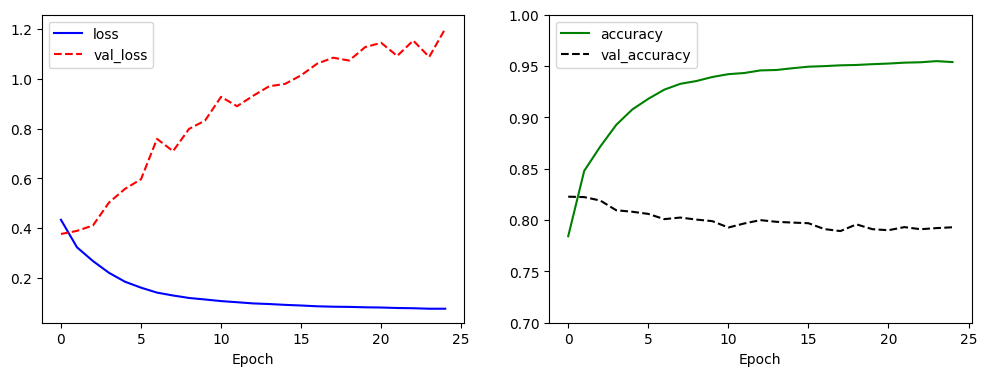

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

모델의 확인

In [ ]:
test_text_x = [row.split('\t')[1] for row in test_text.split('\n')[1:] if row.count('\t') > 0]
test_text_x = [clean_str(sentence) for sentence in test_text_x]
sentences = [sentence.split(' ') for sentence in test_text_x]
sentences_new = []
for sentence in sentences:
    sentences_new.append([word[:5] for word in sentence][:25])
sentences = sentences_new

test_x = tokenizer.texts_to_sequences(sentences)
test_x = pad_sequences(test_x, padding='post')

model.evaluate(test_x, test_y, verbose=0)

[1.2332097291946411, 0.7867000102996826]

In [ ]:
test_sentence = '~~~ 못생기셨지만 그래도 잘하셨어요'
test_sentence = test_sentence.split(' ')
test_sentences = []
now_sentence = []
for word in test_sentence:
    now_sentence.append(word)
    test_sentences.append(now_sentence[:])
    
test_x_1 = tokenizer.texts_to_sequences(test_sentences)
test_x_1 = pad_sequences(test_x_1, padding='post', maxlen=25)
prediction = model.predict(test_x_1)
for idx, sentence in enumerate(test_sentences):
    print(sentence)
    print(prediction[idx])
     

1/1 [==============================] - 0s 31ms/step
['~~~']
[0.5430302  0.45696983]
['~~~', '못생기셨지만']
[0.5430302  0.45696983]
['~~~', '못생기셨지만', '그래도']
[0.533925   0.46607503]
['~~~', '못생기셨지만', '그래도', '잘하셨어요']
[0.533925   0.46607503]


## @ 과제 3
- 실험에 직결되는 과제
- 기존까지는 단어로 분리하였다면, 이번엔 음절로 분리하여 감정을 분석

**평가**

1. *(미리 해둠)* 아래의 `train_text`를 정의된 `clean_str()`를 활용해 기본적인 문자 제거를 하며, 공백(`\n`, `\t` 등 포함) 문자를 기준으로 문장을 리스트로 분리.
1. 모든 리스트의 요소를 벡터의 길이가 1000이 되도록 토큰화
(패딩은 생략)
1. 모델을 생성
1. 모델을 실행
1. 모델을 평가
  - loss, val_loss, accuracy, val_accuracy를 그래프로 출력
  - predict, evaluate를 활용하여 모델을 평가
  - 위의 예제와 같이, 자신이 원하는 문장이 제대로 판단되는지 확인

In [ ]:
path_to_train_file = tf.keras.utils.get_file('train.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')
path_to_test_file = tf.keras.utils.get_file('test.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')

# 불러들이기
train_text = open(path_to_train_file, 'rb').read().decode(encoding='utf-8')
test_text = open(path_to_test_file, 'rb').read().decode(encoding='utf-8')

# 편집
train_y = np.array([[int(row.split('\t')[2])] for row in train_text.split('\n')[1:] if row.count('\t') > 0])
test_y = np.array([[int(row.split('\t')[2])] for row in test_text.split('\n')[1:] if row.count('\t') > 0])

# ===========================

import re
# From https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
def clean_str(string):    
    string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)

    return string.lower()


train_text_x = [row.split('\t')[1] for row in train_text.split('\n')[1:] if row.count('\t') > 0]
train_text_x = [clean_str(sentence) for sentence in train_text_x]
train_text_x[:10]

## 단어 단위 생성

조선 왕조 실록 중 일부

In [ ]:
path_to_file = tf.keras.utils.get_file('input.txt', 'http://bit.ly/2Mc3SOV')

train_text = open(path_to_file, 'rb').read().decode(encoding='utf-8')

print('Length of text: {} characters'.format(len(train_text)))
print()

print(train_text[:100])

62012502/62012502 [==============================] - 0s 0us/step
Length of text: 26265493 characters

﻿태조 이성계 선대의 가계. 목조 이안사가 전주에서 삼척·의주를 거쳐 알동에 정착하다 
태조 강헌 지인 계운 성문 신무 대왕(太祖康獻至仁啓運聖文神武大王)의 성은 이씨(李氏)요, 휘


In [ ]:
import re
# From https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
def clean_str(string):    
    string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", "", string)
    string = re.sub(r"\)", "", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)

    return string


train_text = train_text.split('\n')
train_text = [clean_str(sentence) for sentence in train_text]
train_text_x = []
for sentence in train_text:
  train_text_x.extend(sentence.split(' '))
  train_text_x.append('\n')

train_text_x = [word for word in train_text_x if word != '']

print(train_text_x[:20])

['태조', '이성계', '선대의', '가계', '목조', '이안사가', '전주에서', '삼척', '의주를', '거쳐', '알동에', '정착하다', '\n', '태조', '강헌', '지인', '계운', '성문', '신무', '대왕']


여기서는 직접 토큰화를 할 예정

In [ ]:
# 단어의 set
vocab = sorted(set(train_text_x))
vocab.append('UNK')
print('{} unique words'.format(len(vocab)))

# 숫자로 매핑
word2idx = {u: i for i, u in enumerate(vocab)}
idx2word = np.array(vocab)

text_as_int = np.array([word2idx[c] for c in train_text_x])

332640 unique words


#### cf) 데이터셋 구성
- tf.data.Dataset
  - from_tensor_slices
  - batch
  - take
  - map
  - cf) map에서 쓰이는 함수는 리스트를 반환하도록

In [ ]:
seq_length = 25
examples_per_epoch = len(text_as_int) // seq_length
sentence_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

# seq_length + 1만큼씩 나눔; 남는 거는 버림
sentence_dataset = sentence_dataset.batch(seq_length+1, drop_remainder=True)
for item in sentence_dataset.take(1):
    print(idx2word[item.numpy()])
    print(item.numpy())

['태조' '이성계' '선대의' '가계' '목조' '이안사가' '전주에서' '삼척' '의주를' '거쳐' '알동에' '정착하다'
 '\n' '태조' '강헌' '지인' '계운' '성문' '신무' '대왕' '의' '성은' '이씨' '요' ',' '휘']
[299305 229634 161443  17430 111029 230292 251081 155087 225462  29027
 190295 256129      0 299305  25624 273553  36147 163996 180466  84413
 224182 164549 230248 210912      2 330313]


In [ ]:
def split_input_target(chunk):
    return [chunk[:-1], chunk[-1]]

train_dataset = sentence_dataset.map(split_input_target)
for x,y in train_dataset.take(1):
    print(idx2word[x.numpy()])
    print(x.numpy())
    print(idx2word[y.numpy()])
    print(y.numpy())

['태조' '이성계' '선대의' '가계' '목조' '이안사가' '전주에서' '삼척' '의주를' '거쳐' '알동에' '정착하다'
 '\n' '태조' '강헌' '지인' '계운' '성문' '신무' '대왕' '의' '성은' '이씨' '요' ',']
[299305 229634 161443  17430 111029 230292 251081 155087 225462  29027
 190295 256129      0 299305  25624 273553  36147 163996 180466  84413
 224182 164549 230248 210912      2]
휘
330313


In [ ]:
BATCH_SIZE = 512
steps_per_epoch = examples_per_epoch // BATCH_SIZE
BUFFER_SIZE = 10000

train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

In [ ]:
total_words = len(vocab)
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(total_words, 100, input_length=seq_length),
    tf.keras.layers.LSTM(units=100, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units=100),
    tf.keras.layers.Dense(total_words, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 100)           33264000  
                                                                 
 lstm (LSTM)                 (None, 25, 100)           80400     
                                                                 
 dropout (Dropout)           (None, 25, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 332640)            33596640  
                                                                 
Total params: 67,021,440
Trainable params: 67,021,440
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

def testmodel(epoch, logs):
    if epoch % 5 != 0 and epoch != 49:
        return
    test_sentence = train_text[0]

    next_words = 100
    for _ in range(next_words):
        test_text_X = test_sentence.split(' ')[-seq_length:]
        test_text_X = np.array([word2idx[c] if c in word2idx else word2idx['UNK'] for c in test_text_X])
        # 패딩을 함
        test_text_X = pad_sequences([test_text_X], maxlen=seq_length, padding='pre', value=word2idx['UNK'])

        output_idx = np.argmax(model.predict(test_text_X, verbose=0))  # model.predict_classes는 deprecated됨
        test_sentence += ' ' + idx2word[output_idx]
    
    print()
    print(test_sentence)
    print()
 
testmodelcb = tf.keras.callbacks.LambdaCallback(on_epoch_end=testmodel)

history = model.fit(train_dataset.repeat(), epochs=50, steps_per_epoch=steps_per_epoch, callbacks=[testmodelcb], verbose=2)

Epoch 1/50

 태조 이성계 선대의 가계 목조 이안사가 전주에서 삼척 의주를 거쳐 알동에 정착하다  , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , ,

533/533 - 218s - loss: 9.3748 - accuracy: 0.0720 - 218s/epoch - 410ms/step
Epoch 2/50
533/533 - 172s - loss: 8.3648 - accuracy: 0.0748 - 172s/epoch - 322ms/step
Epoch 3/50
533/533 - 155s - loss: 8.0729 - accuracy: 0.0821 - 155s/epoch - 291ms/step
Epoch 4/50
533/533 - 146s - loss: 7.7792 - accuracy: 0.0936 - 146s/epoch - 274ms/step
Epoch 5/50
533/533 - 140s - loss: 7.4445 - accuracy: 0.1069 - 140s/epoch - 262ms/step
Epoch 6/50

 태조 이성계 선대의 가계 목조 이안사가 전주에서 삼척 의주를 거쳐 알동에 정착하다  것을 계하기를 , 
 상왕이 계하기를 , 
 임금이 말하기를 , 
 임금이 말하기를 , 
 임금이 말하기를 , 
 임금이 말하기를 , 
 임금이 말하기를 , 
 임금이 말하기를 , 
 임금이 말하기를 , 
 임금이 말하기를 , 
 임금이 말하기를 , 
 임금이 말하기를 , 
 임금이 말하기를 , 
 임금이 말하기를 , 
 임금이 말하기를 , 
 임금이 말하기를 , 
 임금이 말하기를 , 
 임금이 말하기를 , 
 임금이 말하기를 , 
 임금이 말하기를 , 
 임

In [ ]:
test_sentence = '동헌에 나가 공무를 본 후 활 십오 순을 쏘았다'

next_words = 100
for _ in range(next_words):
    test_text_X = test_sentence.split(' ')[-seq_length:]
    test_text_X = np.array([word2idx[c] if c in word2idx else word2idx['UNK'] for c in test_text_X])
    test_text_X = pad_sequences([test_text_X], maxlen=seq_length, padding='pre', value=word2idx['UNK'])
    
    output_idx = np.argmax(model.predict(test_text_X, verbose=0))  # model.predict_classes는 deprecated됨
    test_sentence += ' ' + idx2word[output_idx]

print(test_sentence)

동헌에 나가 공무를 본 후 활 십오 순을 쏘았다 인해 우마 에 부제 하게 하였습니다 하물며 이어서 주공 공신 도만호 는 영응 역사 이염 이구 20인 금천 추국토록 하라 
 1 군적을 종천 부월 와 갑산 첨정 윤간 마구음파 피할 때문이었다 근래 관제 통찰사 함녕군 정윤보 선온을 넘어서 편차 태재부 비답 하였으니 , 윤허하지 않았다 남원 훈신 각포 문위 삼았습니다 아아 ! 집정자 와 서해로 전후부 처벌을 지내다 
 평안황해도도순찰사 충청도의 녹권 으로서 기명 와 기명 와 고치었다 포 로 영 등 같은 자는 율 에 의하여 장 를 써서 좋은 법을 써서 다른 법을 생각하여 반드시 심히 말한 자는 더욱 폐단이 있습니다 그러나 다만 노비가 이름을 품고 끝이


## 자소 단위 생성(TODO)

In [ ]:
%%bash
pip install jamotools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### cf) jamtools
- 자모 단위로 나뉨
- split_syllables
- join_jamos

In [ ]:
import jamotools

# 입력을 받음
path_to_file = tf.keras.utils.get_file('input_text', 'http://bit.ly/2Mc3SOV')
train_text = open(path_to_file, 'rb').read().decode(encoding='utf-8')

# 단어 & 인덱스 목록 제작
train_text_x = jamotools.split_syllables(train_text)
vocab = sorted(set(train_text_x)) + ['UNK']
char2idx = {u: i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

# 기존 텍스트를 인덱스로
text_as_int = np.array([char2idx[i] for i in train_text_x])

In [ ]:
# 자료들 편집
seq_length = 80   # 입력시 들어갈 자모 길이
examples_per_epoch = len(text_as_int) // seq_length   # 한 example에 들어가야 할 케이스 개수
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int).batch(seq_length + 1, drop_remainder=True)
train_dataset = char_dataset.map(lambda x: [x[:-1], x[-1]])

# 상수 정의
BATCH_SIZE = 256
steps_per_epoch = examples_per_epoch // BATCH_SIZE
BUFFER_SIZE = 10000

train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

In [ ]:
total_chars = len(vocab)
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(total_chars, 100, input_length=seq_length),
    tf.keras.layers.LSTM(units=400),
    tf.keras.layers.Dense(total_chars, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ==========================================

from tensorflow.keras.preprocessing.sequence import pad_sequences

def testmodel(epoch, logs):
    if epoch % 5 != 0 and epoch != 99:
        return
    
    test_sentence = train_text[:48]
    test_sentence = jamotools.split_syllables(test_sentence)

    next_chars = 300
    for _ in range(next_chars):
        test_text_X = test_sentence[-seq_length:]
        test_text_X = np.array([char2idx[c] if c in char2idx else char2idx['UNK'] for c in test_text_X])
        test_text_X = pad_sequences([test_text_X], maxlen=seq_length, padding='pre', value=char2idx['UNK'])

        output_idx = np.argmax(model.predict(test_text_X, verbose=0))  # model.predict_classes는 deprecated됨
        test_sentence += idx2char[output_idx]
    
    print()
    print(jamotools.join_jamos(test_sentence))
    print()

testmodelcb = tf.keras.callbacks.LambdaCallback(on_epoch_end=testmodel)

history = model.fit(train_dataset.repeat(), epochs=100, steps_per_epoch=steps_per_epoch, callbacks=[testmodelcb], verbose=2)

Epoch 1/100

﻿태조 이성계 선대의 가계. 목조 이안사가 전주에서 삼척·의주를 거쳐 알동에 정착하다 일을 것이 일을 것이 일을 것이 일을 것이 일을 것이 일을 것이 일을 것이 일을 것이 일을 것이 일을 것이 일을 것이 일을 것이 일을 것이 일을 것이 일을 것이 일을 것이 일을 것이 일을 것이 일을 것이 일을 것이 일을 것이 일을 것이 일을 것이 ㅇ

2364/2364 - 209s - loss: 2.5772 - accuracy: 0.3092 - 209s/epoch - 88ms/step
Epoch 2/100
2364/2364 - 112s - loss: 1.9860 - accuracy: 0.4266 - 112s/epoch - 47ms/step
Epoch 3/100
2364/2364 - 116s - loss: 1.8332 - accuracy: 0.4639 - 116s/epoch - 49ms/step
Epoch 4/100
2364/2364 - 112s - loss: 1.7351 - accuracy: 0.4848 - 112s/epoch - 48ms/step
Epoch 5/100
2364/2364 - 112s - loss: 1.6964 - accuracy: 0.4917 - 112s/epoch - 47ms/step
Epoch 6/100

﻿태조 이성계 선대의 가계. 목조 이안사가 전주에서 삼척·의주를 거쳐 알동에 정착하다 하였다. 임금이 아니하여 아뢰기를,
"임금이 아니하여 아뢰기를,
"임금이 아니하여 아뢰기를,
"임금이 아니하여 아뢰기를,
"임금이 아니하여 아뢰기를,
"임금이 아니하여 아뢰기를,
"임금이 아니하여 아뢰기를,
"임금이 아니하여 아뢰기를,
"임금이 아니하여 아뢰기를,
"임금이 아니하여 알

2364/2364 - 130s - loss: 1.6726 - accuracy: 0.4962 - 130s/epoch - 55ms/step
Epoch 7/100
2364/2364 - 107s - loss: 1.6046 - accuracy: 0.5111 - 107s/ep

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
test_sentence = '동헌에 나가 공무를 본 후 활 십오 순을 쏘았다'
test_sentence = jamotools.split_syllables(test_sentence)

next_chars = 300
for _ in range(next_chars):
    test_text_X = test_sentence[-seq_length:]
    test_text_X = np.array([char2idx[c] if c in char2idx else char2idx['UNK'] for c in test_text_X])
    test_text_X = pad_sequences([test_text_X], maxlen=seq_length, padding='pre', value=char2idx['UNK'])
    
    output_idx = np.argmax(model.predict(test_text_X, verbose=0))  # model.predict_classes는 deprecated됨
    test_sentence += ' ' + idx2word[output_idx]
    

print(jamotools.join_jamos(test_sentence))

NameError: ignored

## @ 과제 4
- 지금까지 단어, 자소단위 생성을 해봄
- 그럼 음절 단위 생성도 ... ?

**평가**

1. *(미리 해둠)* 그동안 해왔던 것처럼 `train_text`를 불러올 것.
그리고, 이를 음절 단위롤 분리하여 리스트로 만들 것.
1. *(미리 해둠)* 해당 리스트를 '긍정, 부정 감정 분석'에서 사용한 함수에 넣어 길이 2000의 벡터로 토큰화할 것 (`text_as_idx`)
(단, 패딩은 할 필요 없으니 생략)
1. 해당 리스트를 데이터로 쓸 수 있도록 전처리하기
1. 위 전처리를 바탕으로 자연어 생성 모델을 만듦
1. 자연어 생성 모델을 생성
1. 자연어 생성 모델을 실행
  - 단, 이전까지 해왔던 것처럼 LambdaCallBack을 활용하여 현재 자연어 생성을 잘 하는지 확인할 수 있도록 할 것
  - *(권유)* '단어 단위 생성'의 코드를 복사해서 사용할 것. 단, 이를 위해서는 변수명을 잘 맞춰 상수를 정의해야 함
1. '동헌에 나가 공무를 본 후 활 십오 순을 쏘았다'라는 문구를 통해 자연어를 잘 생성하는지 확인해보기

In [13]:
path_to_file = tf.keras.utils.get_file('input_text', 'http://bit.ly/2Mc3SOV')
train_text = open(path_to_file, 'rb').read().decode(encoding='utf-8')

# ========================================

from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts([train_text])  # 속도를 빠르게
text_as_idx = (tokenizer.texts_to_sequences([train_text]))[0]